In [16]:
import keras
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist ## Data set is imported here
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

In [17]:
image_rows, image_cols = 28, 28
batch_size = 128
num_classes = 10
epochs = 10

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [19]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [20]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [21]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, image_rows, image_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, image_rows, image_cols)
    input_shape = (1, image_rows, image_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], image_rows, image_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], image_rows, image_cols, 1)
    input_shape = (image_rows, image_cols, 1)

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(20, (5, 5), padding="same",input_shape=input_shape))

In [24]:
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [25]:
model.add(Conv2D(50, (5, 5), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [26]:
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

In [27]:
model.add(Dense(num_classes))
model.add(Activation("softmax"))

In [28]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [29]:
theLeNetModel = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Epoch 1/10
469/469 [==============================] - 77s 164ms/step - accuracy: 0.1998 - loss: 2.2700 - val_loss: 2.2380 - val_accuracy: 0.2824
Epoch 2/10
469/469 [==============================] - 82s 176ms/step - accuracy: 0.3948 - loss: 2.2028 - val_loss: 2.1655 - val_accuracy: 0.5206
Epoch 3/10
469/469 [==============================] - 92s 196ms/step - accuracy: 0.5962 - loss: 2.1225 - val_loss: 2.0725 - val_accuracy: 0.6489
Epoch 4/10
469/469 [==============================] - 92s 196ms/step - accuracy: 0.6836 - loss: 2.0141 - val_loss: 1.9430 - val_accuracy: 0.7086
Epoch 5/10
469/469 [==============================] - 85s 181ms/step - accuracy: 0.7196 - loss: 1.8652 - val_loss: 1.7691 - val_accuracy: 0.7358
Epoch 6/10
469/469 [==============================] - 90s 192ms/step - accuracy: 0.7381 - loss: 1.6729 - val_loss: 1.5541 - val_accuracy: 0.7556
Epoch 7/10
469/469 [==============================] - 90s 193ms/step - accuracy: 0.7575 - loss: 1.4511 - val_loss: 1.3226 - val_ac

In [30]:
score = model.evaluate(x_test, y_test, verbose=0)


Text(0, 0.5, 'acc')

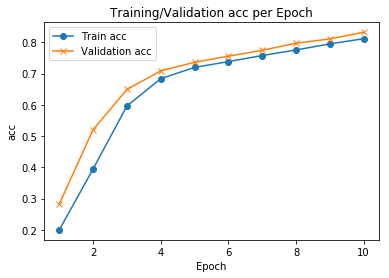

In [32]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + theLeNetModel.history['accuracy'], 'o-')
ax.plot([None] + theLeNetModel.history['val_accuracy'], 'x-')
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'acc')

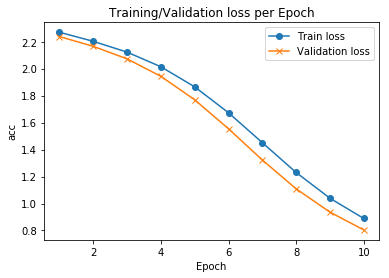

In [33]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + theLeNetModel.history['loss'], 'o-')
ax.plot([None] + theLeNetModel.history['val_loss'], 'x-')
ax.legend(['Train loss', 'Validation loss'], loc = 0)
ax.set_title('Training/Validation loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')